In [3]:
import pandas as pd
import calendar
import seaborn as sns


data3 = pd.read_csv('june30.txt')
data2 = pd.read_csv('june23.txt')
data4 = pd.read_csv('june16.txt')
data = pd.concat([data3,data2,data4],ignore_index = True)

print(data.shape)
print(data2.shape)
print(data3.shape)
data3.head()

(590354, 11)
(196686, 11)
(196690, 11)


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,00:00:00,REGULAR,6667150,2259901
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,04:00:00,REGULAR,6667173,2259909
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,08:00:00,REGULAR,6667189,2259938
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,12:00:00,REGULAR,6667305,2260006
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,16:00:00,REGULAR,6667534,2260066


In [4]:
#data['DATE/TIME'] = pd.to_datetime(data['DATE'] + ' ' + data['TIME'])
data['day'] = pd.to_datetime(data['DATE'])

In [5]:
by_day = data[(data['DESC'] == 'REGULAR')]

In [6]:
by_day = by_day.groupby(['C/A','UNIT','SCP','LINENAME','DIVISION','STATION','day'])['ENTRIES'].min().reset_index()

In [7]:
by_day['day2'] = by_day['day'] - pd.Timedelta(1,'D')
by_day.head()

,C/A,UNIT,SCP,LINENAME,DIVISION,STATION,day,ENTRIES,day2
0,A002,R051,02-00-00,NQR456W,BMT,59 ST,2018-06-09,6649975,2018-06-08
1,A002,R051,02-00-00,NQR456W,BMT,59 ST,2018-06-10,6650723,2018-06-09
2,A002,R051,02-00-00,NQR456W,BMT,59 ST,2018-06-11,6651277,2018-06-10
3,A002,R051,02-00-00,NQR456W,BMT,59 ST,2018-06-12,6652785,2018-06-11
4,A002,R051,02-00-00,NQR456W,BMT,59 ST,2018-06-13,6654264,2018-06-12


In [8]:
by_day['COUNT'] = by_day.sort_values(['C/A','UNIT','SCP','day']).groupby(['C/A','UNIT','SCP'])['ENTRIES'].diff()

In [9]:
Counts_by_turnstile = by_day[['DIVISION','C/A','UNIT','SCP','STATION','day2','COUNT']]
Counts_by_turnstile.dropna(axis=0, inplace=True)
Counts_by_turnstile = Counts_by_turnstile.sort_values(['DIVISION','C/A','UNIT','SCP','day2'])

def data_cleanse(row):
    counter = row['COUNT']
    if counter < 0:
        counter = -counter
    if counter > 90000:
        counter = 0
    return counter

Counts_by_turnstile['Fixed Counts'] = Counts_by_turnstile.apply(data_cleanse, axis=1)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [10]:
Counts_by_turnstile

,DIVISION,C/A,UNIT,SCP,STATION,day2,COUNT,Fixed Counts
1,BMT,A002,R051,02-00-00,59 ST,2018-06-09,748.0,748.0
2,BMT,A002,R051,02-00-00,59 ST,2018-06-10,554.0,554.0
3,BMT,A002,R051,02-00-00,59 ST,2018-06-11,1508.0,1508.0
4,BMT,A002,R051,02-00-00,59 ST,2018-06-12,1479.0,1479.0
5,BMT,A002,R051,02-00-00,59 ST,2018-06-13,1410.0,1410.0
6,BMT,A002,R051,02-00-00,59 ST,2018-06-14,1551.0,1551.0
7,BMT,A002,R051,02-00-00,59 ST,2018-06-15,1500.0,1500.0
8,BMT,A002,R051,02-00-00,59 ST,2018-06-16,699.0,699.0
9,BMT,A002,R051,02-00-00,59 ST,2018-06-17,549.0,549.0
10,BMT,A002,R051,02-00-00,59 ST,2018-06-18,1355.0,1355.0


In [11]:
%matplotlib inline

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

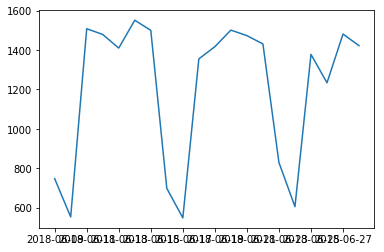

In [13]:
(
plt.plot(Counts_by_turnstile[(Counts_by_turnstile['SCP']=='02-00-00')
        & (Counts_by_turnstile['STATION']=='59 ST')]['day2']
        ,Counts_by_turnstile[(Counts_by_turnstile['SCP']=='02-00-00')
        & (Counts_by_turnstile['STATION']=='59 ST')]['Fixed Counts'])
)    

In [14]:
count_by_station = Counts_by_turnstile.groupby(['STATION','DIVISION','day2'])['Fixed Counts'].sum().reset_index()

count_by_station['Name_of_Day'] = count_by_station['day2'].dt.weekday_name
count_by_station['Week Number'] = count_by_station['day2'].dt.week

In [15]:
def fixed_week(row):
    week = row['Week Number']
    if row['Name_of_Day'] == 'Saturday':
        week += 1
    elif row['Name_of_Day'] == 'Sunday':
        week += 1
    return week

count_by_station['Week Number'] = count_by_station.apply(fixed_week, axis=1)

In [16]:
mask = (count_by_station['STATION'] == '86 ST') & (count_by_station['DIVISION'] == 'BMT')
print(count_by_station[mask])

     STATION DIVISION       day2  Fixed Counts Name_of_Day  Week Number
2736   86 ST      BMT 2018-06-09        6849.0    Saturday           24
2737   86 ST      BMT 2018-06-10        5013.0      Sunday           24
2738   86 ST      BMT 2018-06-11       13680.0      Monday           24
2739   86 ST      BMT 2018-06-12       13684.0     Tuesday           24
2740   86 ST      BMT 2018-06-13       13660.0   Wednesday           24
2741   86 ST      BMT 2018-06-14       13617.0    Thursday           24
2742   86 ST      BMT 2018-06-15       12691.0      Friday           24
2743   86 ST      BMT 2018-06-16        8863.0    Saturday           25
2744   86 ST      BMT 2018-06-17        6578.0      Sunday           25
2745   86 ST      BMT 2018-06-18       13184.0      Monday           25
2746   86 ST      BMT 2018-06-19       14011.0     Tuesday           25
2747   86 ST      BMT 2018-06-20       13867.0   Wednesday           25
2748   86 ST      BMT 2018-06-21       13578.0    Thursday      

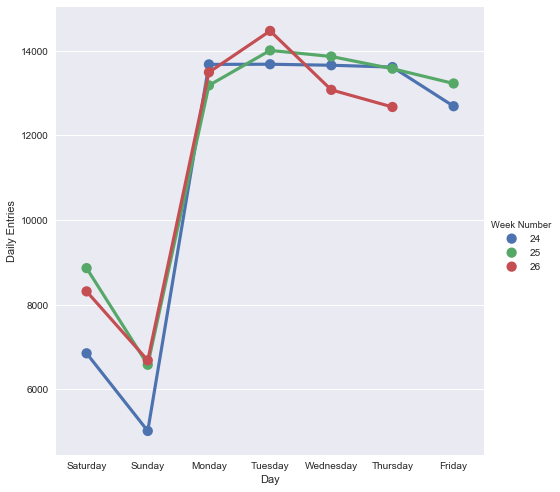

In [17]:
sns.set()
fig = sns.factorplot(x='Name_of_Day',y='Fixed Counts',hue ='Week Number', size=7, data = count_by_station[mask])
fig.set_axis_labels('Day','Daily Entries')

# Total By Station

In [18]:
totals_by_station = count_by_station.groupby(['STATION','DIVISION'])['Fixed Counts'].sum().reset_index()

In [19]:
totals_by_station = totals_by_station.sort_values('Fixed Counts', ascending = False)

In [20]:
totals_by_station

,STATION,DIVISION,Fixed Counts
287,GRD CNTRL-42 ST,IRT,2617020.0
89,42 ST-PORT AUTH,IND,1830374.0
418,TIMES SQ-42 ST,IRT,1605614.0
81,34 ST-PENN STA,IRT,1486414.0
80,34 ST-PENN STA,IND,1422052.0
78,34 ST-HERALD SQ,IND,1381388.0
22,14 ST-UNION SQ,BMT,1330926.0
139,86 ST,IRT,1210198.0
278,FULTON ST,IND,1133014.0
110,59 ST COLUMBUS,IND,1010398.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10e569c50>]],
      dtype=object)

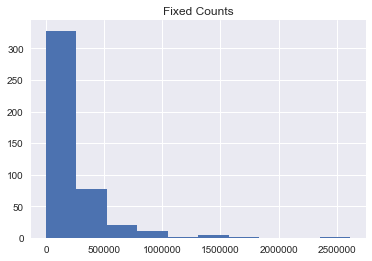

In [21]:
totals_by_station.hist()

In [22]:
print(totals_by_station)

             STATION DIVISION  Fixed Counts
287  GRD CNTRL-42 ST      IRT     2617020.0
89   42 ST-PORT AUTH      IND     1830374.0
418   TIMES SQ-42 ST      IRT     1605614.0
81    34 ST-PENN STA      IRT     1486414.0
80    34 ST-PENN STA      IND     1422052.0
78   34 ST-HERALD SQ      IND     1381388.0
22    14 ST-UNION SQ      BMT     1330926.0
139            86 ST      IRT     1210198.0
278        FULTON ST      IND     1133014.0
110   59 ST COLUMBUS      IND     1010398.0
375     PATH NEW WTC      PTH     1008106.0
265    FLUSHING-MAIN      IRT     1000594.0
210         CANAL ST      BMT      988699.0
93    47-50 STS ROCK      IND      970347.0
145            96 ST      IRT      936091.0
15            125 ST      IRT      902784.0
312  JKSN HT-ROOSVLT      IND      898908.0
62             23 ST      IND      886897.0
77   34 ST-HERALD SQ      BMT      876855.0
429   W 4 ST-WASH SQ      IND      772381.0
123            72 ST      IRT      756155.0
109            59 ST      IRT   

In [36]:
totals_by_station.to_csv('final_counts2.csv',sep = '\t')

In [23]:
station_detail = pd.read_csv('http://web.mta.info/developers/data/nyct/subway/Stations.csv')

In [25]:
station_detail['STATION'] = station_detail['Stop Name'].str.upper()

In [26]:
single_station = station_detail.groupby(['STATION', 'Division']).head(1)

In [29]:
totals_with_lat = pd.merge(totals_by_station,single_station, how = 'left', right_on = ['STATION','Division'], left_on = ['STATION','DIVISION'])

In [30]:
totals_with_lat

,STATION,DIVISION,Fixed Counts,Station ID,Complex ID,GTFS Stop ID,Division,Line,Stop Name,Borough,Daytime Routes,Structure,GTFS Latitude,GTFS Longitude
0,GRD CNTRL-42 ST,IRT,2617020.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,42 ST-PORT AUTH,IND,1830374.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TIMES SQ-42 ST,IRT,1605614.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,34 ST-PENN STA,IRT,1486414.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,34 ST-PENN STA,IND,1422052.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,34 ST-HERALD SQ,IND,1381388.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,14 ST-UNION SQ,BMT,1330926.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,86 ST,IRT,1210198.0,311.0,311.0,121,IRT,Broadway - 7Av,86 St,M,1,Subway,40.788644,-73.976218
8,FULTON ST,IND,1133014.0,172.0,628.0,A38,IND,8th Av - Fulton St,Fulton St,M,A C,Subway,40.710197,-74.007691
9,59 ST COLUMBUS,IND,1010398.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
totals_with_lat['Division'].value_counts()

IRT    107
IND     93
BMT     91
Name: Division, dtype: int64

In [35]:
len(totals_with_lat)

445